In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-02-12 16:39:10--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.207, 108.177.12.207, 108.177.13.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   105MB/s    in 1.4s    

2024-02-12 16:39:11 (105 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-02-12 16:39:12--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.207, 108.177.12.207, 108.177.13.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2024-02-12 16:39:12 (90.0 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import zipfile

# unzip training data set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
import os

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print("Train Horse Names ",train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print("Train Human Names ",train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print("Validation Horse Names ", validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print("Validation Human Names ", validation_human_names[:10])

Train Horse Names  ['horse43-3.png', 'horse38-8.png', 'horse46-6.png', 'horse05-4.png', 'horse04-6.png', 'horse37-8.png', 'horse10-7.png', 'horse28-2.png', 'horse19-6.png', 'horse19-2.png']
Train Human Names  ['human11-00.png', 'human13-09.png', 'human03-21.png', 'human03-05.png', 'human09-30.png', 'human17-17.png', 'human14-30.png', 'human17-14.png', 'human11-29.png', 'human15-17.png']
Validation Horse Names  ['horse3-255.png', 'horse5-519.png', 'horse2-254.png', 'horse1-000.png', 'horse4-588.png', 'horse5-065.png', 'horse1-384.png', 'horse4-232.png', 'horse2-224.png', 'horse2-441.png']
Validation Human Names  ['valhuman04-02.png', 'valhuman04-04.png', 'valhuman01-09.png', 'valhuman01-11.png', 'valhuman04-15.png', 'valhuman02-10.png', 'valhuman05-04.png', 'valhuman02-05.png', 'valhuman03-08.png', 'valhuman05-06.png']


In [ ]:
len(train_horse_names)

500

In [ ]:
len(train_human_names)

527

In [ ]:
len(validation_horse_names)

128

In [ ]:
len(validation_human_names)

128

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rows = 4
cols = 4

index = 0

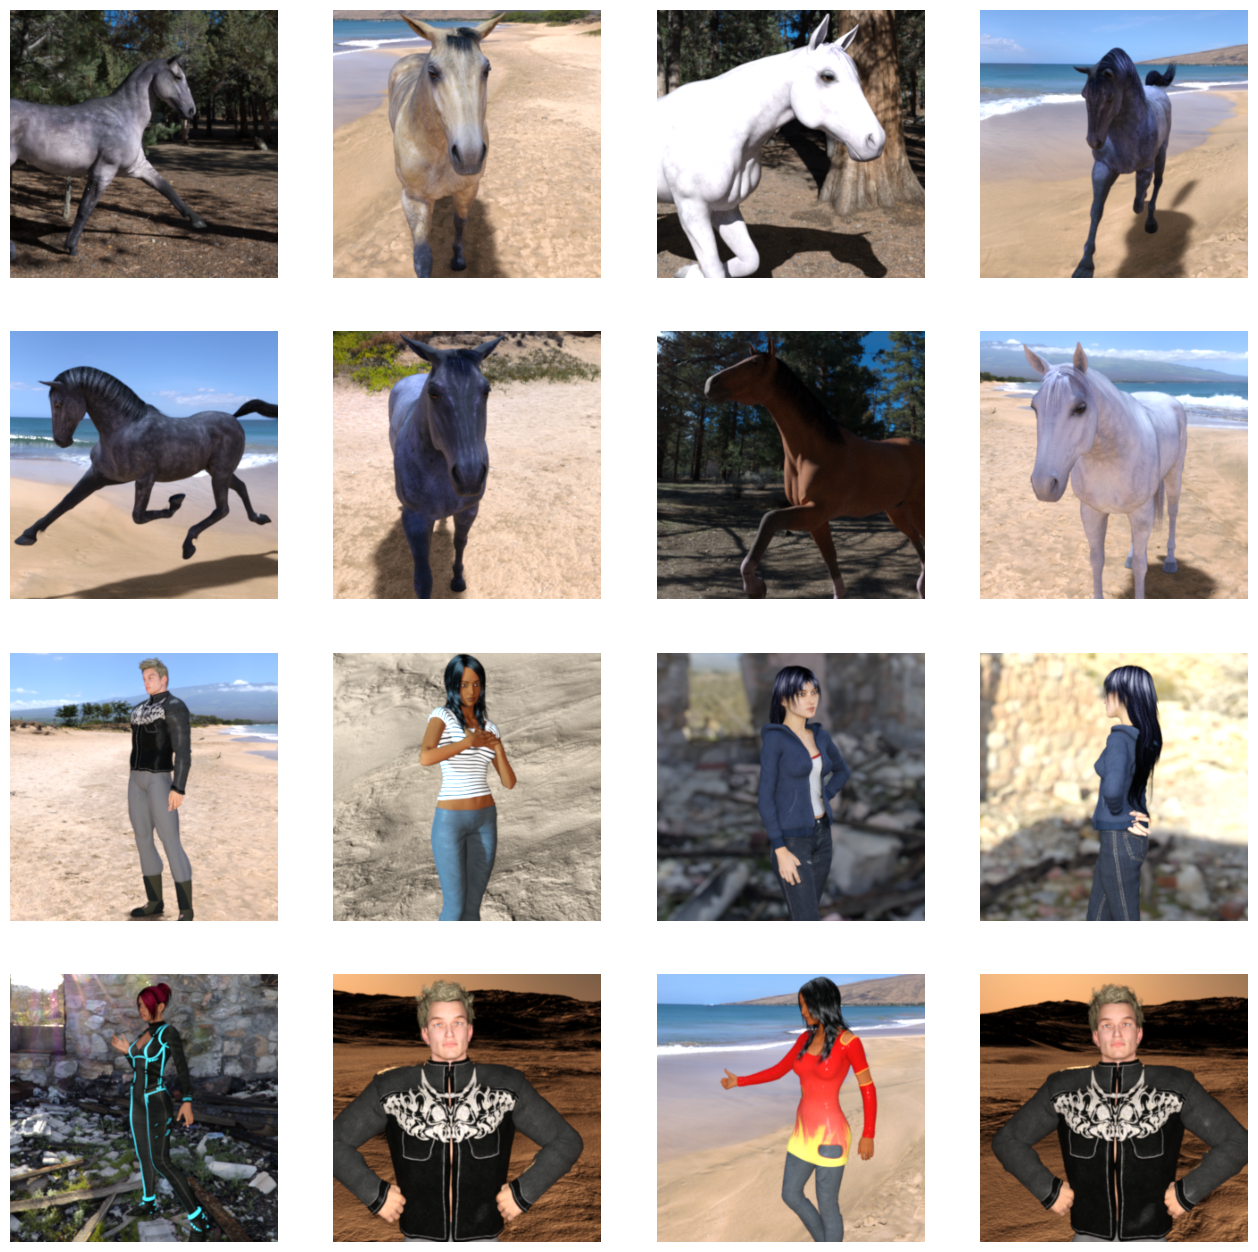

In [ ]:
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)

index += 8

next_horse_pic = [os.path.join(train_horse_dir, fname)
                    for fname in train_horse_names[index-8:index]]

next_human_pic = [os.path.join(train_human_dir, fname)
                    for fname in train_human_names[index-8:index]]

for i, img_path in enumerate(next_horse_pic + next_human_pic):

    sp = plt.subplot(rows, cols, i+1)
    sp.axis('off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size=(3, 3),
                        activation='relu',input_shape = (300, 300, 3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3),
                        activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3),
                        activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3),
                        activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3),
                        activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(units = 512, activation = 'relu'),

    keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [ ]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rescale=1/255)
validation_data_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_data_generator.flow_from_directory(
    './horse-or-human',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = validation_data_generator.flow_from_directory(
    './validation-horse-or-human',
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/15
8/8 [==============================] - 98s 12s/step - loss: 0.7521 - accuracy: 0.5451 - val_loss: 0.6785 - val_accuracy: 0.5039
Epoch 2/15
8/8 [==============================] - 95s 11s/step - loss: 0.7539 - accuracy: 0.6363 - val_loss: 0.6846 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 96s 12s/step - loss: 0.6499 - accuracy: 0.6685 - val_loss: 0.6499 - val_accuracy: 0.6289
Epoch 4/15
8/8 [==============================] - 97s 14s/step - loss: 0.5896 - accuracy: 0.7241 - val_loss: 0.4889 - val_accuracy: 0.7227
Epoch 5/15
8/8 [==============================] - 96s 11s/step - loss: 0.5918 - accuracy: 0.7720 - val_loss: 0.6337 - val_accuracy: 0.8594
Epoch 6/15
8/8 [==============================] - 97s 12s/step - loss: 0.5971 - accuracy: 0.7753 - val_loss: 0.8407 - val_accuracy: 0.5156
Epoch 7/15
8/8 [==============================] - 94s 11s/step - loss: 0.5970 - accuracy: 0.7475 - val_loss: 0.5575 - val_accuracy: 0.6250
Epoch 8/15
8/8 [===========

In [ ]:
model.save('C1_W4_Lab_2_image_generator_with_validation.h5')

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

    path = '/content/' + fn
    img = image.load_img(path, target_size = (300, 300))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])

    if classes[0]>0.5:
        print(fn ," is human")
    else:
        print(fn ," is horse")

Saving karina-carvalho-fKTKVrNqXQQ-unsplash.jpg to karina-carvalho-fKTKVrNqXQQ-unsplash.jpg
1/1 [==============================] - 0s 51ms/step
[0.9991755]
karina-carvalho-fKTKVrNqXQQ-unsplash.jpg  is human


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')